In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')


In [60]:
df = pd.read_csv('/content/data (2).csv')
#df = pd.read_csv(dataset_url)

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
len(df)

569

In [ ]:
df.diagnosis.value_counts()/len(df)*100

,count
diagnosis,
B,62.741652
M,37.258348


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Missing Value**

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<Axes: >

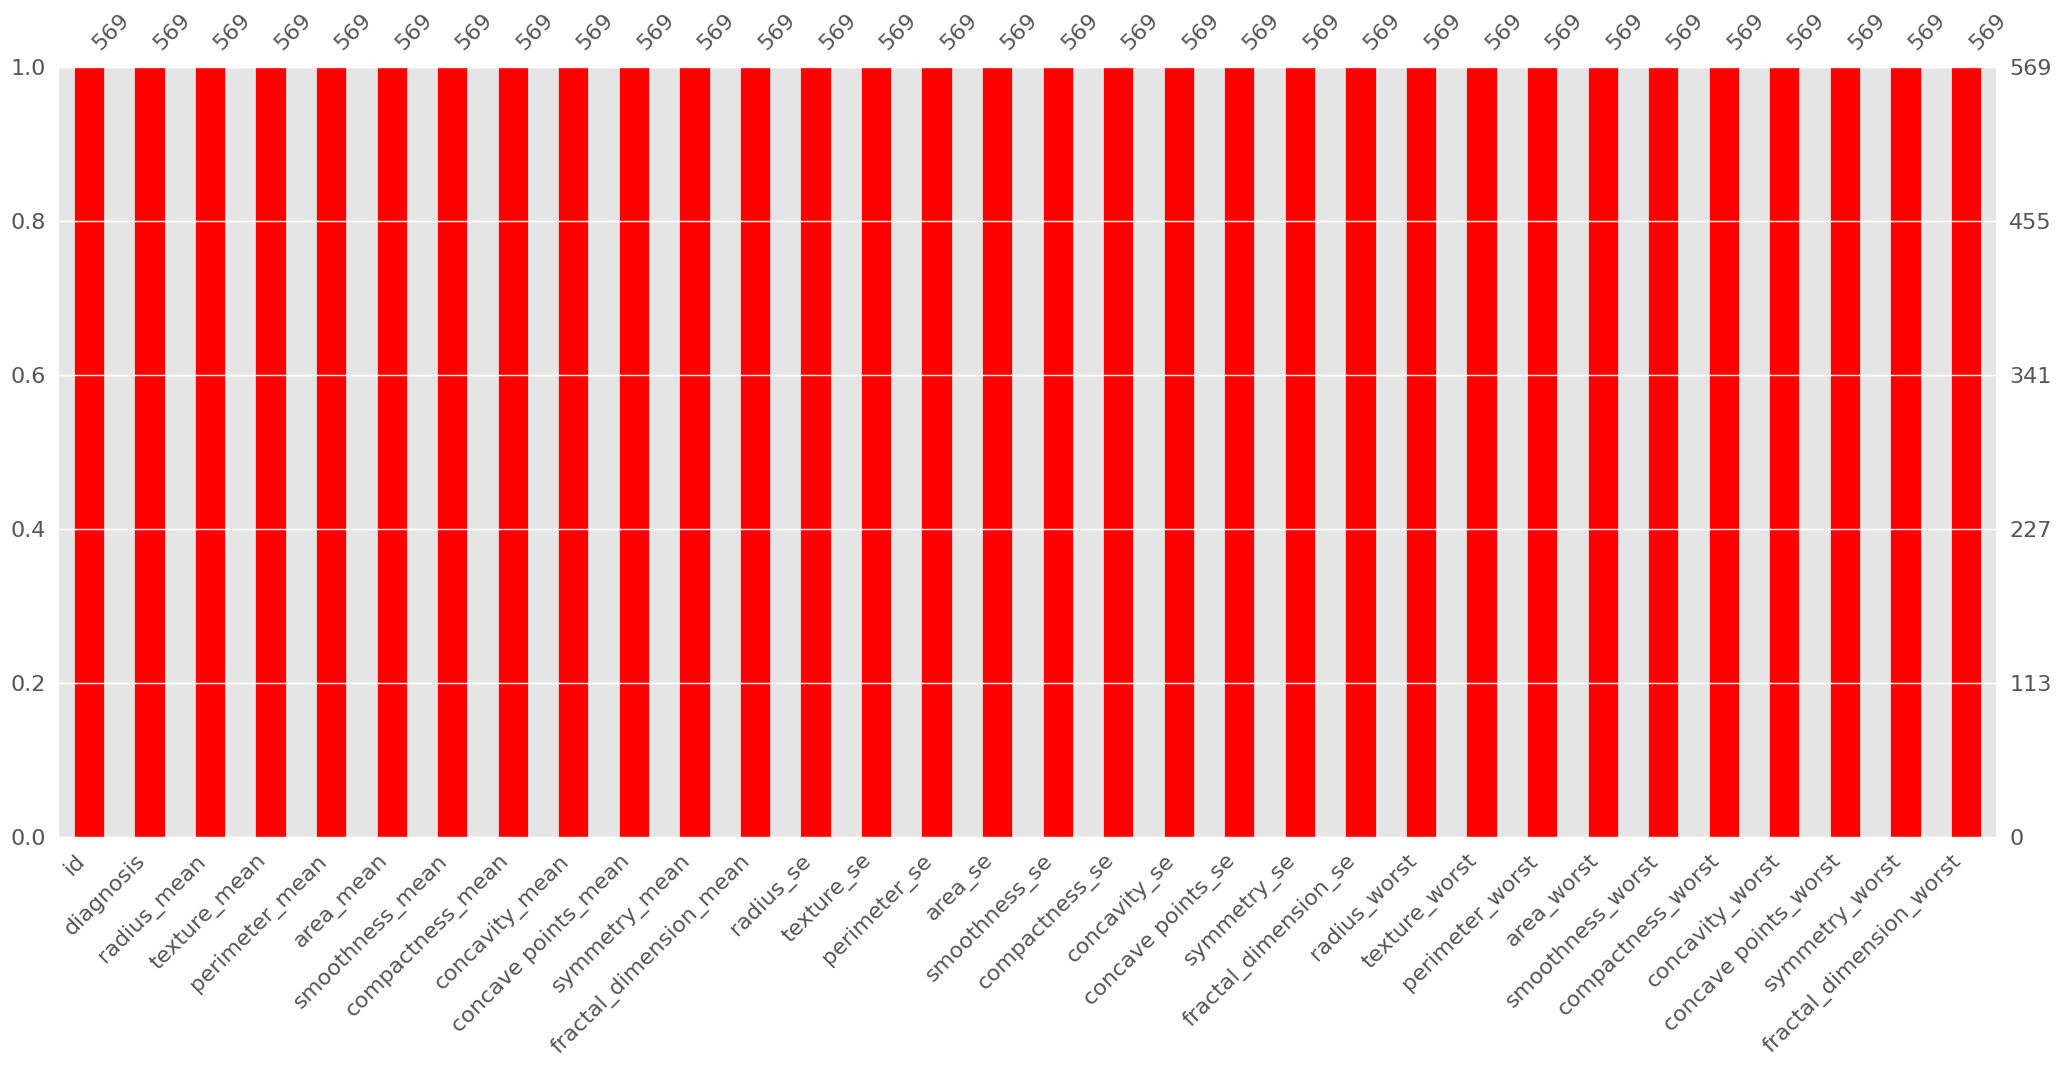

In [ ]:
#no missing value identified

msno.bar(df, color="red")

**Splitting the data into X & y**

In [62]:
x=df.drop(['id','diagnosis'],axis=1)
y=df.diagnosis.values

**Train Test Split**

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [64]:
len(x_train)

426

In [65]:
len(x_test)

143

**Feature Scaling**

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [67]:
x_train_sc

array([[ 2.13378852,  0.36043566,  2.24949086, ...,  1.03100674,
        -0.0896382 ,  0.25030915],
       [ 0.87345968, -0.53612403,  0.84010537, ...,  1.05530745,
         0.46589203, -0.15925245],
       [-0.8938329 , -0.52695206, -0.87540029, ..., -0.32011221,
        -0.18617296,  1.80169549],
       ...,
       [ 0.21355716,  0.0783977 ,  0.12103114, ..., -0.89117867,
        -0.43024198, -1.27413958],
       [ 1.07454585,  0.26183703,  1.06199113, ...,  0.49639133,
         0.67171143, -0.42752903],
       [-0.54264014, -0.80669703, -0.56393842, ..., -1.03379341,
        -0.72895332, -1.15264547]])

In [68]:
x_test_sc

array([[-1.46537079, -0.11879957, -1.334786  , ..., -0.02607373,
         0.4604278 ,  1.18048126],
       [ 0.80548689,  0.36272865,  0.79079742, ...,  1.00974363,
        -0.47213442, -0.44182246],
       [-0.79187371,  0.22056318, -0.61530087, ...,  2.14580138,
         6.84082908,  4.89127424],
       ...,
       [-0.71540432,  1.15151774, -0.66501972, ...,  0.22148966,
        -0.14428052,  0.86162793],
       [-0.96180569,  1.09877894, -0.97237259, ..., -1.26935833,
         0.32200059, -0.42697929],
       [ 1.24447783,  0.19075429,  1.21402397, ...,  0.49791012,
        -0.98577221, -0.53967744]])

**Model Building - KNN**

In [69]:
from sklearn.neighbors import KNeighborsClassifier

#initiate the classifier
model_knn=KNeighborsClassifier()

#passing the data to classifier
model_knn.fit(x_train_sc,y_train)

#KNeighborsClassifier()

KNeighborsClassifier()

In [70]:
#prediction on x_test data

y_pred_knn=model_knn.predict(x_test_sc)

In [71]:
#compare between x_test and y_test data (output comparison)
y_pred_knn

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M'],
      dtype=object)

In [72]:
#compare between x_test and y_test data (output comparison)

y_test

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

**Classification metrics to check how the model behaves**

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("AS_OUTPUT:",round(accuracy_score(y_test,y_pred_knn)*100,2))
print ("CM_OUTPUT:",confusion_matrix(y_test,y_pred_knn))
print ("CR_OUTPUT:",classification_report(y_test,y_pred_knn))

AS_OUTPUT: 96.5
CM_OUTPUT: [[93  2]
 [ 3 45]]
CR_OUTPUT:               precision    recall  f1-score   support

           B       0.97      0.98      0.97        95
           M       0.96      0.94      0.95        48

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



**Prediction of a New patient**

In [74]:
new_data = [[22.57,16.77,121.9,1326,0.08474,0.07864,0.0969,0.07017,0.1812,
             0.05667,0.5435,0.7339,3.398,74.08,0.105225,0.01308,0.0186,0.0234,
             0.01389,0.003532,23.99,23.41,158.8,1956,0.2238,0.1866,0.2416,0.186,0.275,0.09902]]

In [75]:
new_data_sc=sc.transform(new_data)

In [76]:
new_data_sc

array([[ 2.36602889e+00, -6.07206767e-01,  1.20580598e+00,
         1.85888551e+00, -8.03809455e-01, -4.97488494e-01,
         9.42964120e-02,  5.36222391e-01,  5.88710194e-03,
        -8.62062149e-01,  4.38857337e-01, -9.11850426e-01,
         2.25249319e-01,  6.46064747e-01,  3.18025849e+01,
        -7.26962500e-01, -4.56902135e-01,  1.92884478e+00,
        -8.45296020e-01, -8.61680401e-02,  1.53316720e+00,
        -3.92390507e-01,  1.47870618e+00,  1.79380527e+00,
         3.86084850e+00, -4.46883046e-01, -1.61874948e-01,
         1.05986383e+00, -2.40815278e-01,  8.24245131e-01]])

In [77]:
y_pred_single=model_knn.predict(new_data_sc)

In [78]:
y_pred_single

array(['B'], dtype=object)

**Prediction of a Existing Patient**

In [20]:
new_data_1 = [[20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,
               0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,
               0.0134,0.01389,0.003532,24.99,23.41,
               158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902]]

In [21]:
new_data_1_sc=sc.transform(new_data_1)
y_pred_single2=model_knn.predict(new_data_1_sc)

In [22]:
y_pred_single2

array(['M'], dtype=object)

**Model Building - Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier

#initiate the classifier
model_dt=DecisionTreeClassifier()

#passing the data to classifier
model_dt.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [83]:
#prediction on x_test data

y_pred_dt=model_dt.predict(x_test_sc)

In [84]:
#Classification metrics to check how the model behaves

from sklearn.metrics import accuracy_score
print("AS_OUTPUT:",round(accuracy_score(y_test,y_pred_dt)*100,2))

AS_OUTPUT: 90.91


**Model Building - Random Forest**

In [85]:
from sklearn.ensemble import RandomForestClassifier

#initiate the classifier
model_rf=DecisionTreeClassifier()

#passing the data to classifier
model_rf.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [89]:
#prediction on x_test data

y_pred_rf=model_rf.predict(x_test_sc)

In [90]:
#Classification metrics to check how the model behaves

from sklearn.metrics import accuracy_score
print("AS_OUTPUT:",round(accuracy_score(y_test,y_pred_rf)*100,2))

AS_OUTPUT: 92.31


**Model Building - Naive Bayes**

In [91]:
from sklearn.naive_bayes import GaussianNB

#initiate the classifier
model_nb=GaussianNB()

#passing the data to classifier
model_nb.fit(x_train_sc,y_train)

GaussianNB()

In [94]:
#prediction on x_test data

y_pred_nb=model_nb.predict(x_test_sc)

In [95]:
#Classification metrics to check how the model behaves

from sklearn.metrics import accuracy_score
print("AS_OUTPUT:",round(accuracy_score(y_test,y_pred_nb)*100,2))

AS_OUTPUT: 91.61
